In [1]:
%pylab inline
from simulation import *
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
import sys
import matplotlib
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
import matplotlib.gridspec as gridspec
import os


Populating the interactive namespace from numpy and matplotlib


In [2]:
gamelogs2016 = [file for file in os.listdir("./gamelogs/2016") if file.endswith("txt")]
gamelogs2017= [file for file in os.listdir("./gamelogs/2017") if file.endswith("txt")]
gamelogs2015 = [file for file in os.listdir("./gamelogs/2015") if file.endswith("txt")]

gamelogs = []
gamelogs += ["./gamelogs/2017/"+file for file in gamelogs2017]
#gamelogs += ["./gamelogs/2016/"+file for file in gamelogs2016]


#gamelogs = ["nbafinals/game1"]
#gamelogs = ["nbafinals/game1","nbafinals/game2","nbafinals/game3","nbafinals/game4","nbafinals/game5"]
#gamelogs += ["nbafinals/cavspacers1","nbafinals/cavspacers2","nbafinals/cavspacers3","nbafinals/cavspacers4"]
#gamelogs += ["nbafinals/cavsraptors1","nbafinals/cavsraptors2","nbafinals/cavsraptors3","nbafinals/cavsraptors4"]
#gamelogs += ["nbafinals/cavsceltics1","nbafinals/cavsceltics2","nbafinals/cavsceltics3","nbafinals/cavsceltics4","nbafinals/cavsceltics5"]

In [3]:
Lebron_FT  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "free throw" in line]) for game in gamelogs]
Lebron_3  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "three" in line]) for game in gamelogs]
Lebron_jumper  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tLeBron' in line and "jumper" in line]) for game in gamelogs]

Kyrie_FT = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKyrie Irving' in line and "free throw" in line]) for game in gamelogs]
Kyrie_3  = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKyrie Irving' in line and "three" in line]) for game in gamelogs]
Kyrie_jumper = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tKyrie Irving' in line and "jumper" in line]) for game in gamelogs]

JR_3 = ["".join(["+" if "makes" in line else "-" for line in open(game) if '\tJR' in line and "three" in line]) for game in gamelogs]
#Klay_3 = ["".join(["+" if "makes" in line else "-" for line in open("./gamelogs/"+game) if '\tKlay' in line and "three" in line]) for game in gamelogs]

In [26]:
bron_models_3 = evaluate_models([l for l in Lebron_3 if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
bron_models_FT = evaluate_models([l for l in Lebron_FT if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
bron_models_jumper = evaluate_models([l for l in Lebron_jumper if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])

kyrie_models_3 = evaluate_models([l for l in Kyrie_3 if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
kyrie_models_FT = evaluate_models([l for l in Kyrie_FT if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])
kyrie_models_jumper = evaluate_models([l for l in Kyrie_jumper if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])

JR_models_3 = evaluate_models([l for l in JR_3 if len(l)>0],["+","-"],alpha=1,qbounds = [0,3])


In [27]:
bron_0 = infer_model(Lebron_FT,["+","-"],0,0)
bron_1 = infer_model(Lebron_FT,["+","-"],1,1)
bron_2 = infer_model(Lebron_FT,["+","-"],1,2)
bron_3 = infer_model(Lebron_FT,["+","-"],1,3)
bron_4 = infer_model(Lebron_FT,["+","-"],1,4)

In [28]:
bron_0

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'': array([ 0.67965368,  0.32034632])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'': array([ 471.,  222.])}))

In [29]:
bron_1

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([ 0.65783133,  0.34216867]),
              '-': array([ 0.73298429,  0.26701571]),
              '0': array([ 0.65591398,  0.34408602])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([ 272.,  141.]),
              '-': array([ 139.,   50.]),
              '0': array([ 60.,  31.])}))

([<matplotlib.axis.XTick at 0x108c7b438>,
 <a list of 4 Text xticklabel objects>)

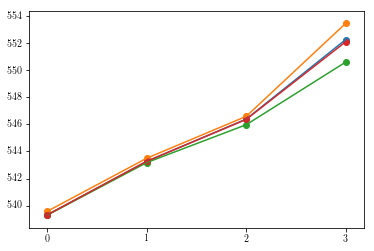

In [30]:


plt.plot([v for v in bron_models_3['LOO'].values()])
plt.scatter(range(4),[v for v in bron_models_3['LOO'].values()])
plt.plot([v for v in bron_models_3['AIC'].values()])
plt.scatter(range(4),[v for v in bron_models_3['AIC'].values()])
plt.plot([v for v in bron_models_3['WAIC1'].values()])
plt.scatter(range(4),[v for v in bron_models_3['WAIC1'].values()])
plt.plot([v for v in bron_models_3['WAIC2'].values()])
plt.scatter(range(4),[v for v in bron_models_3['WAIC2'].values()])


plt.xticks(range(4))


([<matplotlib.axis.XTick at 0x108d3eba8>,
 <a list of 4 Text xticklabel objects>)

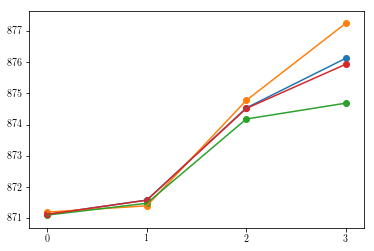

In [31]:


plt.plot([v for v in bron_models_FT['LOO'].values()])
plt.scatter(range(4),[v for v in bron_models_FT['LOO'].values()])
plt.plot([v for v in bron_models_FT['AIC'].values()])
plt.scatter(range(4),[v for v in bron_models_FT['AIC'].values()])
plt.plot([v for v in bron_models_FT['WAIC1'].values()])
plt.scatter(range(4),[v for v in bron_models_FT['WAIC1'].values()])
plt.plot([v for v in bron_models_FT['WAIC2'].values()])
plt.scatter(range(4),[v for v in bron_models_FT['WAIC2'].values()])


plt.xticks(range(4))


In [32]:
bron_models_FT

{'AIC': {0: 871.20249676244839,
  1: 871.40329241488053,
  2: 874.77100102435656,
  3: 877.23450280113082},
 'DIC1': {0: 871.19761104505756,
  1: 871.34013134999918,
  2: 874.40285217013309,
  3: 875.22501158659986},
 'DIC2': {0: 871.19528434756785,
  1: 871.31266077053965,
  2: 874.32453882279867,
  3: 875.28008827235124},
 'LOO': {0: 871.13173404602094,
  1: 871.58570743784128,
  2: 874.53156217105789,
  3: 876.1167330151859},
 'LPD': {0: 868.5097816351863,
  1: 863.3295328455788,
  2: 855.95421909502397,
  3: 837.07790893951676},
 'LPPD': {0: 869.29379896084993,
  1: 865.27090823189928,
  2: 861.09133888923816,
  3: 848.42324743226891},
 'LPPDCV2': {0: 870.24084815305832,
  1: 880.21199811725376,
  2: 878.48686326987752,
  3: 884.91489861620232},
 'WAIC1': {0: 871.10715908712382,
  1: 871.4842111278017,
  2: 874.17640181283377,
  3: 874.68339034597579},
 'WAIC2': {0: 871.13133850216025,
  1: 871.58349036265861,
  2: 874.51397189402223,
  3: 875.92619245025026},
 'kDIC1': {0: 0.99713

In [11]:
bron_models_3

{'AIC': {0: 539.5914734537746,
  1: 543.50645860498867,
  2: 546.59405220362578,
  3: 553.45426792066564,
  4: 570.94588780435697},
 'DIC1': {0: 539.58367147886588,
  1: 543.43065225487999,
  2: 546.17147097149211,
  3: 551.13139128123271,
  4: 559.61654882873017},
 'DIC2': {0: 539.57811355757508,
  1: 543.37688218779454,
  2: 545.91908324554868,
  3: 550.19071380415653,
  4: 559.7993332168935},
 'LOO': {0: 539.32921096332757,
  1: 543.27932999176983,
  2: 546.39122585613939,
  3: 552.26154691024362,
  4: 566.31561427584825},
 'LPD': {0: 536.89899982846146,
  1: 535.43362826049542,
  2: 527.78019458997858,
  3: 513.29282896704967,
  4: 490.15766251207469},
 'LPPD': {0: 537.86582749820263,
  1: 537.75860747442687,
  2: 532.84318666048034,
  3: 524.39879283530468,
  4: 513.77714772407671},
 'LPPDCV2': {0: 539.72063956781858,
  1: 542.80641882999078,
  2: 552.18225956115975,
  3: 569.46451694309906,
  4: 586.12147011171851},
 'WAIC1': {0: 539.31005752806186,
  1: 543.18557726420215,
  2: 

In [12]:
bron_models_jumper

{'AIC': {0: 712.20673838013772,
  1: 713.34585291263522,
  2: 716.52869682896562,
  3: 723.14306471302564,
  4: 730.99724920838798},
 'DIC1': {0: 712.20075584250549,
  1: 713.27775122295975,
  2: 716.14879338364108,
  3: 721.21618688307535,
  4: 722.46707247792529},
 'DIC2': {0: 712.19804934756689,
  1: 713.24527604752393,
  2: 716.02053489679884,
  3: 720.57410039381307,
  4: 725.82069627386159},
 'LOO': {0: 712.09593131066595,
  1: 713.32338908103179,
  2: 716.22954961066364,
  3: 722.24711218707466,
  4: 728.42615604233958},
 'LPD': {0: 709.51412193038686,
  1: 705.27251534574464,
  2: 697.71240889741625,
  3: 682.93898854614565,
  4: 649.88298822947547},
 'LPPD': {0: 710.33627145816354,
  1: 707.4091562346606,
  2: 702.90046967488865,
  3: 693.9725825855262,
  4: 673.65361467686421},
 'LPPDCV2': {0: 710.52577389266526,
  1: 710.73830560585566,
  2: 708.92299859649438,
  3: 721.47038071004795,
  4: 728.87918143523279},
 'WAIC1': {0: 712.07231067895191,
  1: 713.22610255845245,
  2: 

In [16]:
infer_model(Lebron_jumper,["+","-"],0,0)

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'': array([ 0.31634446,  0.68365554])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'': array([ 180.,  389.])}))

In [18]:
infer_model(Lebron_jumper,["+","-"],0,1)

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([ 0.36875,  0.63125]),
              '-': array([ 0.29245283,  0.70754717]),
              '0': array([ 0.30769231,  0.69230769])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([  59.,  101.]),
              '-': array([  93.,  225.]),
              '0': array([ 28.,  63.])}))

([<matplotlib.axis.XTick at 0x108772c50>,
 <a list of 5 Text xticklabel objects>)

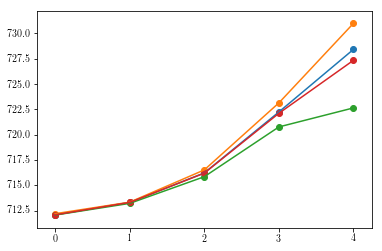

In [20]:


plt.plot([v for v in bron_models_jumper['LOO'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_jumper['LOO'].values()])
plt.plot([v for v in bron_models_jumper['AIC'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_jumper['AIC'].values()])
plt.plot([v for v in bron_models_jumper['WAIC1'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_jumper['WAIC1'].values()])
plt.plot([v for v in bron_models_jumper['WAIC2'].values()])
plt.scatter([0,1,2,3,4],[v for v in bron_models_jumper['WAIC2'].values()])


plt.xticks([0,1,2,3,4])


In [33]:
bron_1

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([ 0.65783133,  0.34216867]),
              '-': array([ 0.73298429,  0.26701571]),
              '0': array([ 0.65591398,  0.34408602])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'+': array([ 272.,  141.]),
              '-': array([ 139.,   50.]),
              '0': array([ 60.,  31.])}))

In [34]:
bron_0

(defaultdict(functools.partial(<built-in function zeros>, 2),
             {'': array([ 0.67965368,  0.32034632])}),
 defaultdict(functools.partial(<built-in function zeros>, 2),
             {'': array([ 471.,  222.])}))

In [35]:
471+222

693